# Visualization - End Of Day Stock Prices for Tesla, Ford, GM, Daimler & BMW

**The Data:**

  - We will grab the EOD prices from yahoo API 

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader
import datetime
# For accessing the yahoo API
import pandas_datareader.data as web
from pandas.plotting import scatter_matrix

In [51]:
start=datetime.datetime(2007,1,1)
end=datetime.datetime(2019,1,1)

In [52]:
tesla=web.DataReader('TSLA','yahoo',start,end)
ford=web.DataReader('F','yahoo',start,end)
gm=web.DataReader('GM','yahoo',start,end)
daimler=web.DataReader('DDAIF','yahoo',start,end)
BMW=web.DataReader('BMWYY','yahoo',start,end)

In [117]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA20,returns,Cumulative Returns,Cumulative returns
Date,,,,,,,,,,,
2010-06-29,25.00,17.540001,19.000000,23.889999,18766300,23.889999,3.565597e+08,NaN,NaN,NaN,NaN
2010-06-30,30.42,23.299999,25.790001,23.830000,17187100,23.830000,4.432553e+08,NaN,-0.002511,0.997489,0.997489
2010-07-01,25.92,20.270000,25.000000,21.959999,8218800,21.959999,2.054700e+08,NaN,-0.078473,0.919213,0.919213
2010-07-02,23.10,18.709999,23.000000,19.200001,5139800,19.200001,1.182154e+08,NaN,-0.125683,0.803684,0.803684
2010-07-06,20.00,15.830000,20.000000,16.110001,6866900,16.110001,1.373380e+08,NaN,-0.160938,0.674341,0.674341


  ## Opening Prices

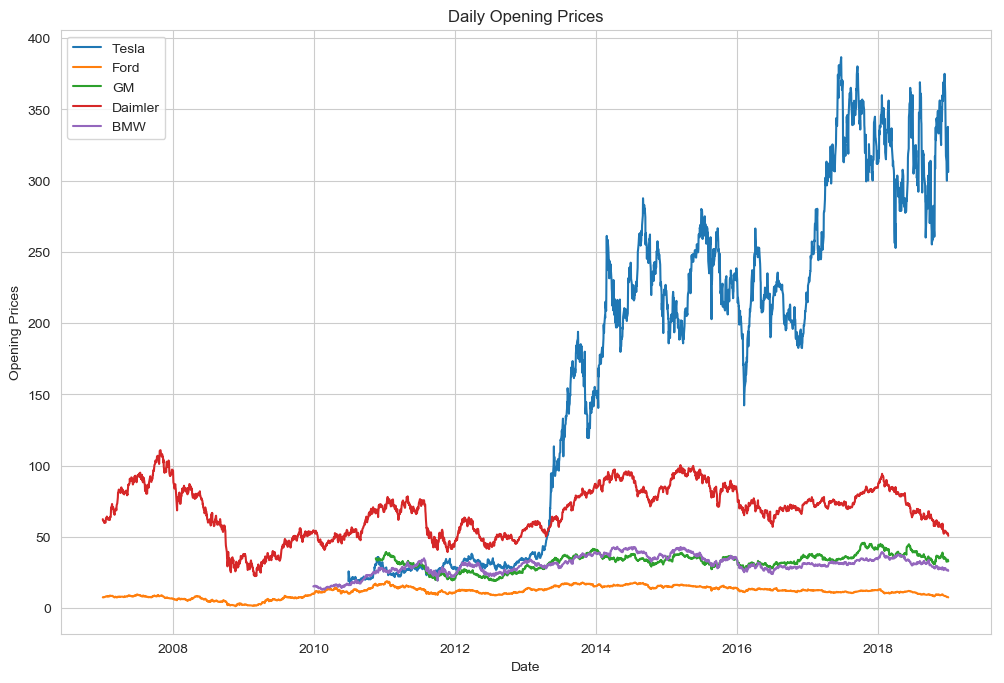

In [53]:
plt.figure(figsize=[12,8],dpi=100)
plt.title('Daily Opening Prices')
plt.plot(tesla['Open'])
plt.plot(ford['Open'])
plt.plot(gm['Open'])
plt.plot(daimler['Open'])
plt.plot(BMW['Open'])
plt.ylabel('Opening Prices')
plt.xlabel('Date')
plt.legend(['Tesla','Ford','GM','Daimler','BMW']);

## Daily Trade Volume

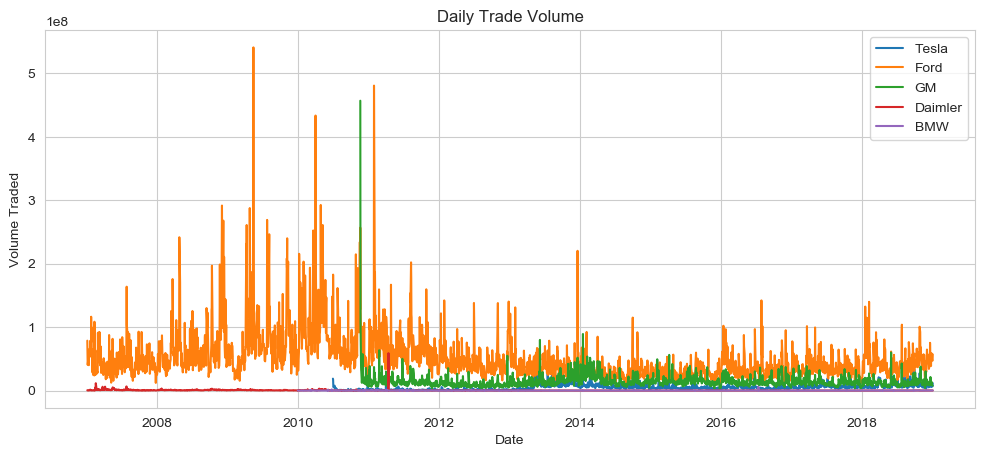

In [116]:
plt.figure(figsize=[12,5],dpi=100)
plt.title('Daily Trade Volume')
plt.plot(tesla['Volume'])
plt.plot(ford['Volume'])
plt.plot(gm['Volume'])
plt.plot(daimler['Volume'])
plt.plot(BMW['Volume'])
plt.ylabel('Volume Traded')
plt.xlabel('Date')
plt.legend(['Tesla','Ford','GM','Daimler','BMW']);

## Approx. Market Cap (using opening prices)

In [55]:
tesla['Total Traded']=tesla['Open']*tesla['Volume']
ford['Total Traded']=ford['Open']*ford['Volume']
gm['Total Traded']=gm['Open']*gm['Volume']
daimler['Total Traded']=daimler['Open']*daimler['Volume']
BMW['Total Traded']=BMW['Open']*BMW['Volume']

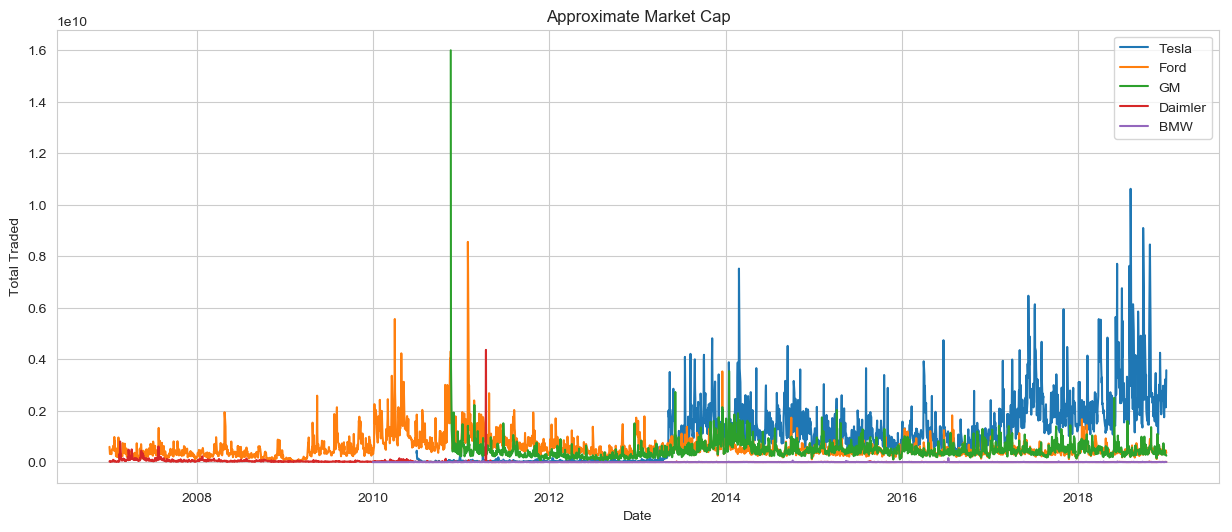

In [56]:
plt.figure(figsize=[15,6],dpi=100)
plt.title('Approximate Market Cap')
plt.plot(tesla['Total Traded'])
plt.plot(ford['Total Traded'])
plt.plot(gm['Total Traded'])
plt.plot(daimler['Total Traded'])
plt.plot(BMW['Total Traded'])
plt.ylabel('Total Traded')
plt.xlabel('Date')
plt.legend(['Tesla','Ford','GM','Daimler','BMW']);

## Rolling Averages (20 day)

In [57]:
tesla['MA20']=tesla['Open'].rolling(20).mean()
ford['MA20']=ford['Open'].rolling(20).mean()
gm['MA20']=gm['Open'].rolling(20).mean()
daimler['MA20']=daimler['Open'].rolling(20).mean()
BMW['MA20']=BMW['Open'].rolling(20).mean()

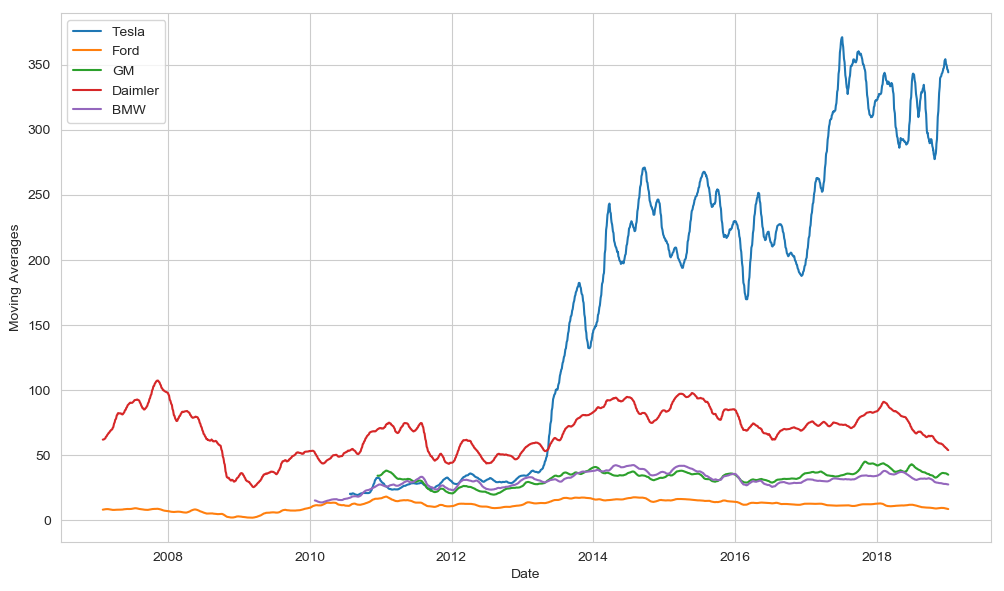

In [58]:
plt.figure(figsize=[12,7],dpi=100)
plt.plot(tesla['MA20'])
plt.plot(ford['MA20'])
plt.plot(gm['MA20'])
plt.plot(daimler['MA20'])
plt.plot(BMW['MA20'])
plt.ylabel('Moving Averages')
plt.xlabel('Date')
plt.legend(['Tesla','Ford','GM','Daimler','BMW'],loc=0);

## Scatter Matrix of Opening Prices

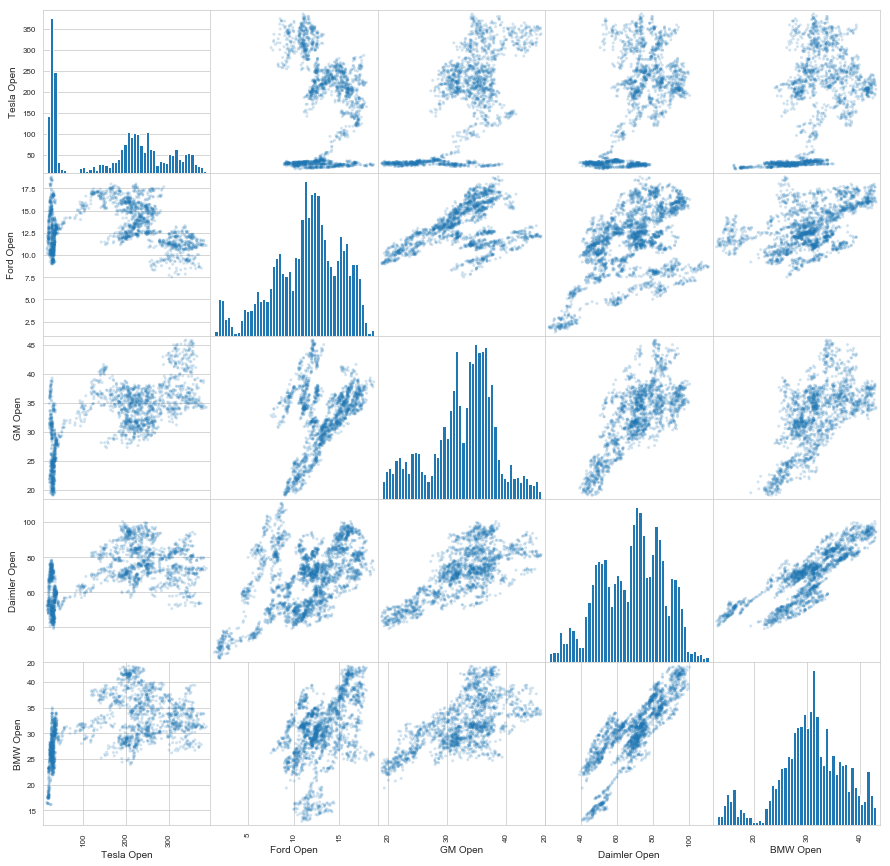

In [59]:
car_comp=pd.concat([tesla['Open'],ford['Open'],gm['Open'],daimler['Open'],BMW['Open']],axis=1)
car_comp.columns=['Tesla Open','Ford Open','GM Open','Daimler Open','BMW Open']
scatter_matrix(car_comp,figsize=(15,15),alpha=0.2,hist_kwds={'bins':50});

# Candlestick Chart for Tesla in January 2018

In [60]:
import mpl_finance
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

- **Resetting the dataframe index to start from 0.**

- **creating new column with a matplotlib date 'starts counting whole number of days from 0,0,0001.**

 - **We need to do this for the dataframe to be input in the candelstick chart graph, which identifies days based on the Gregorian calendar starting from year 0**

In [114]:
tesla_reset=tesla.loc['2018-01'].reset_index()

tesla_reset['date_ax']=tesla_reset['Date'].apply(lambda date: date2num(date))
tesla_values=[tuple(vals) for vals in tesla_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

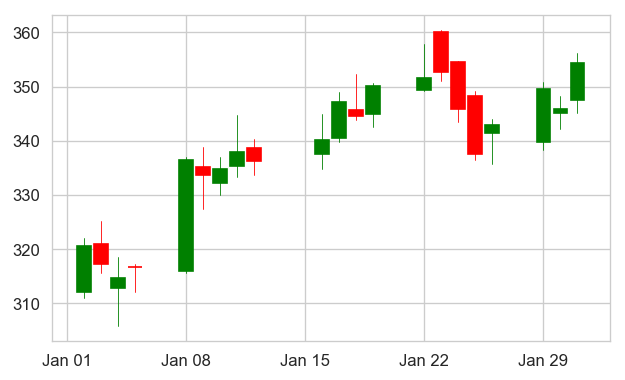

In [122]:
#copied from candlestick chart documentation and implemented on the list of tuples 'tesla_values'
mondays=WeekdayLocator(MONDAY) 
alldays=DayLocator() 
weekFormatter=DateFormatter('%b %d') 
dayFormatter=DateFormatter('%d') 


fig, ax = plt.subplots(figsize=(6,4), dpi=120)
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)
candlestick_ohlc(ax,tesla_values,width=0.8,colorup='g',colordown='r');

## Percentage Change (daily)
 - creating a 'returns' column in each company's dataframe, each row of 'returns' contains the percentage daily change from last close.

In [63]:
companies=[tesla,ford,gm,daimler,BMW]
for i in range(0,len(companies)):
    companies[i]['returns']=companies[i]['Close']/companies[i]['Close'].shift(1)-1

## Histogram of daily percent change

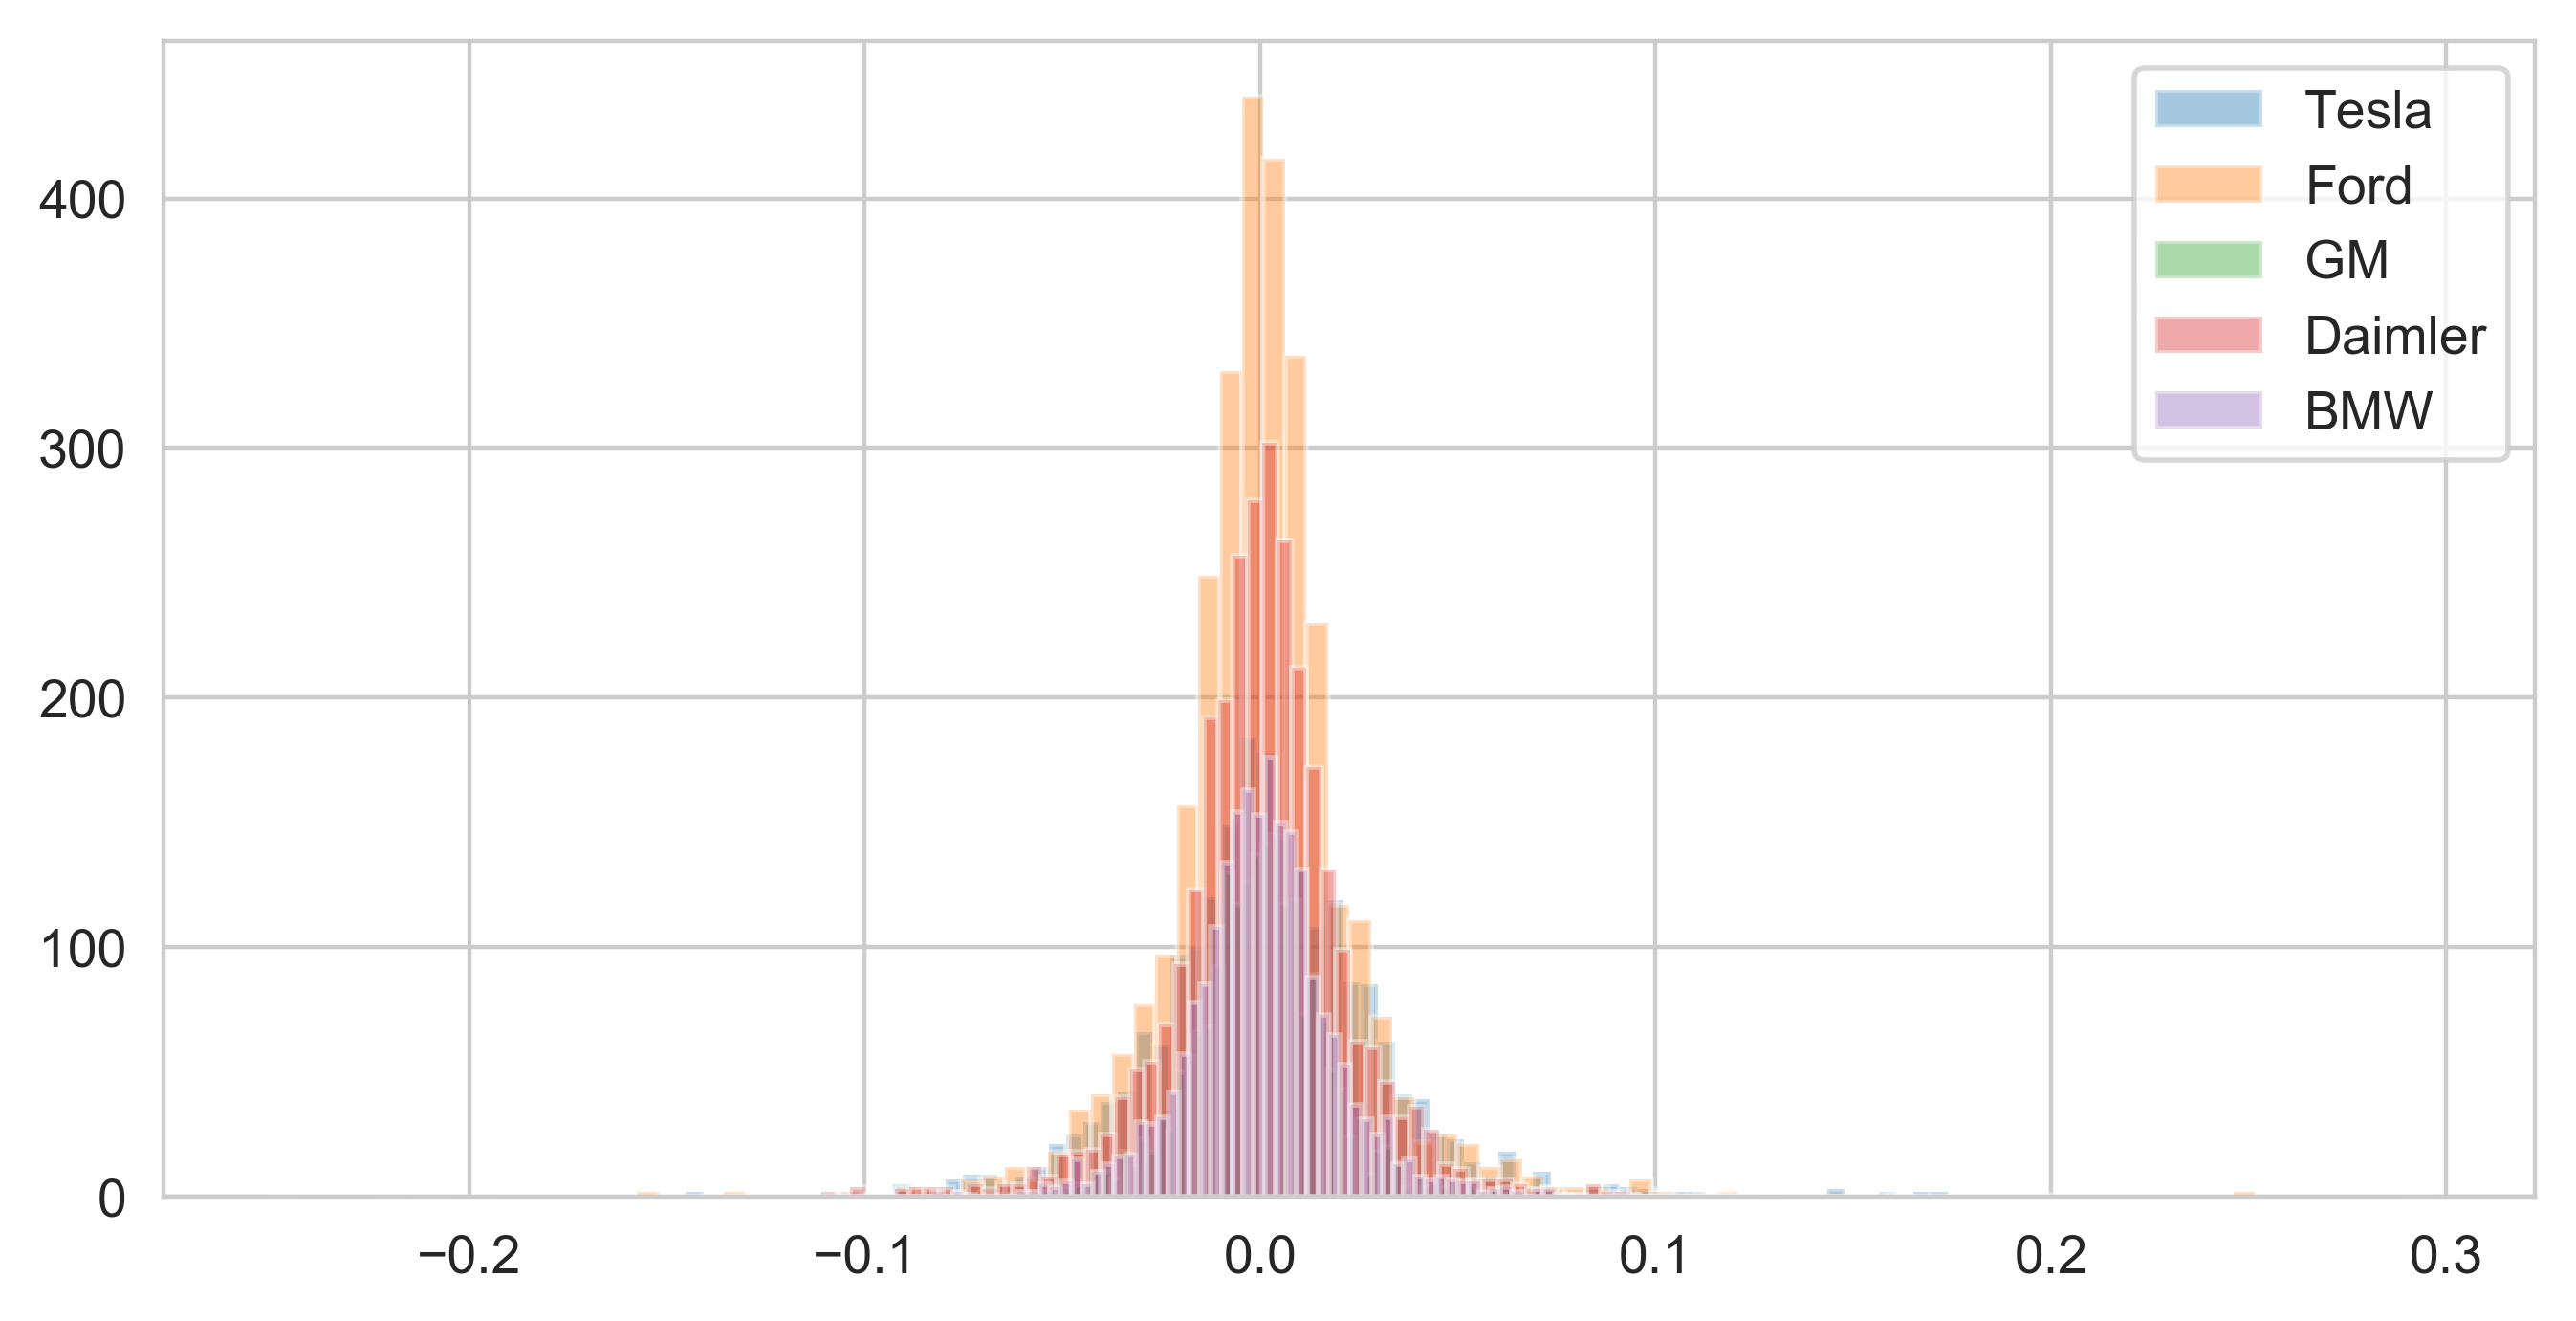

In [91]:
labels=['Tesla','Ford','GM','Daimler','BMW']

fig = plt.figure(dpi=400)
for i in range(len(companies)):
    companies[i]['returns'].hist(bins=100,label=labels[i],alpha=0.4,figsize=(8,4))
plt.legend();




## Kernel Density Estimation of daily percent change

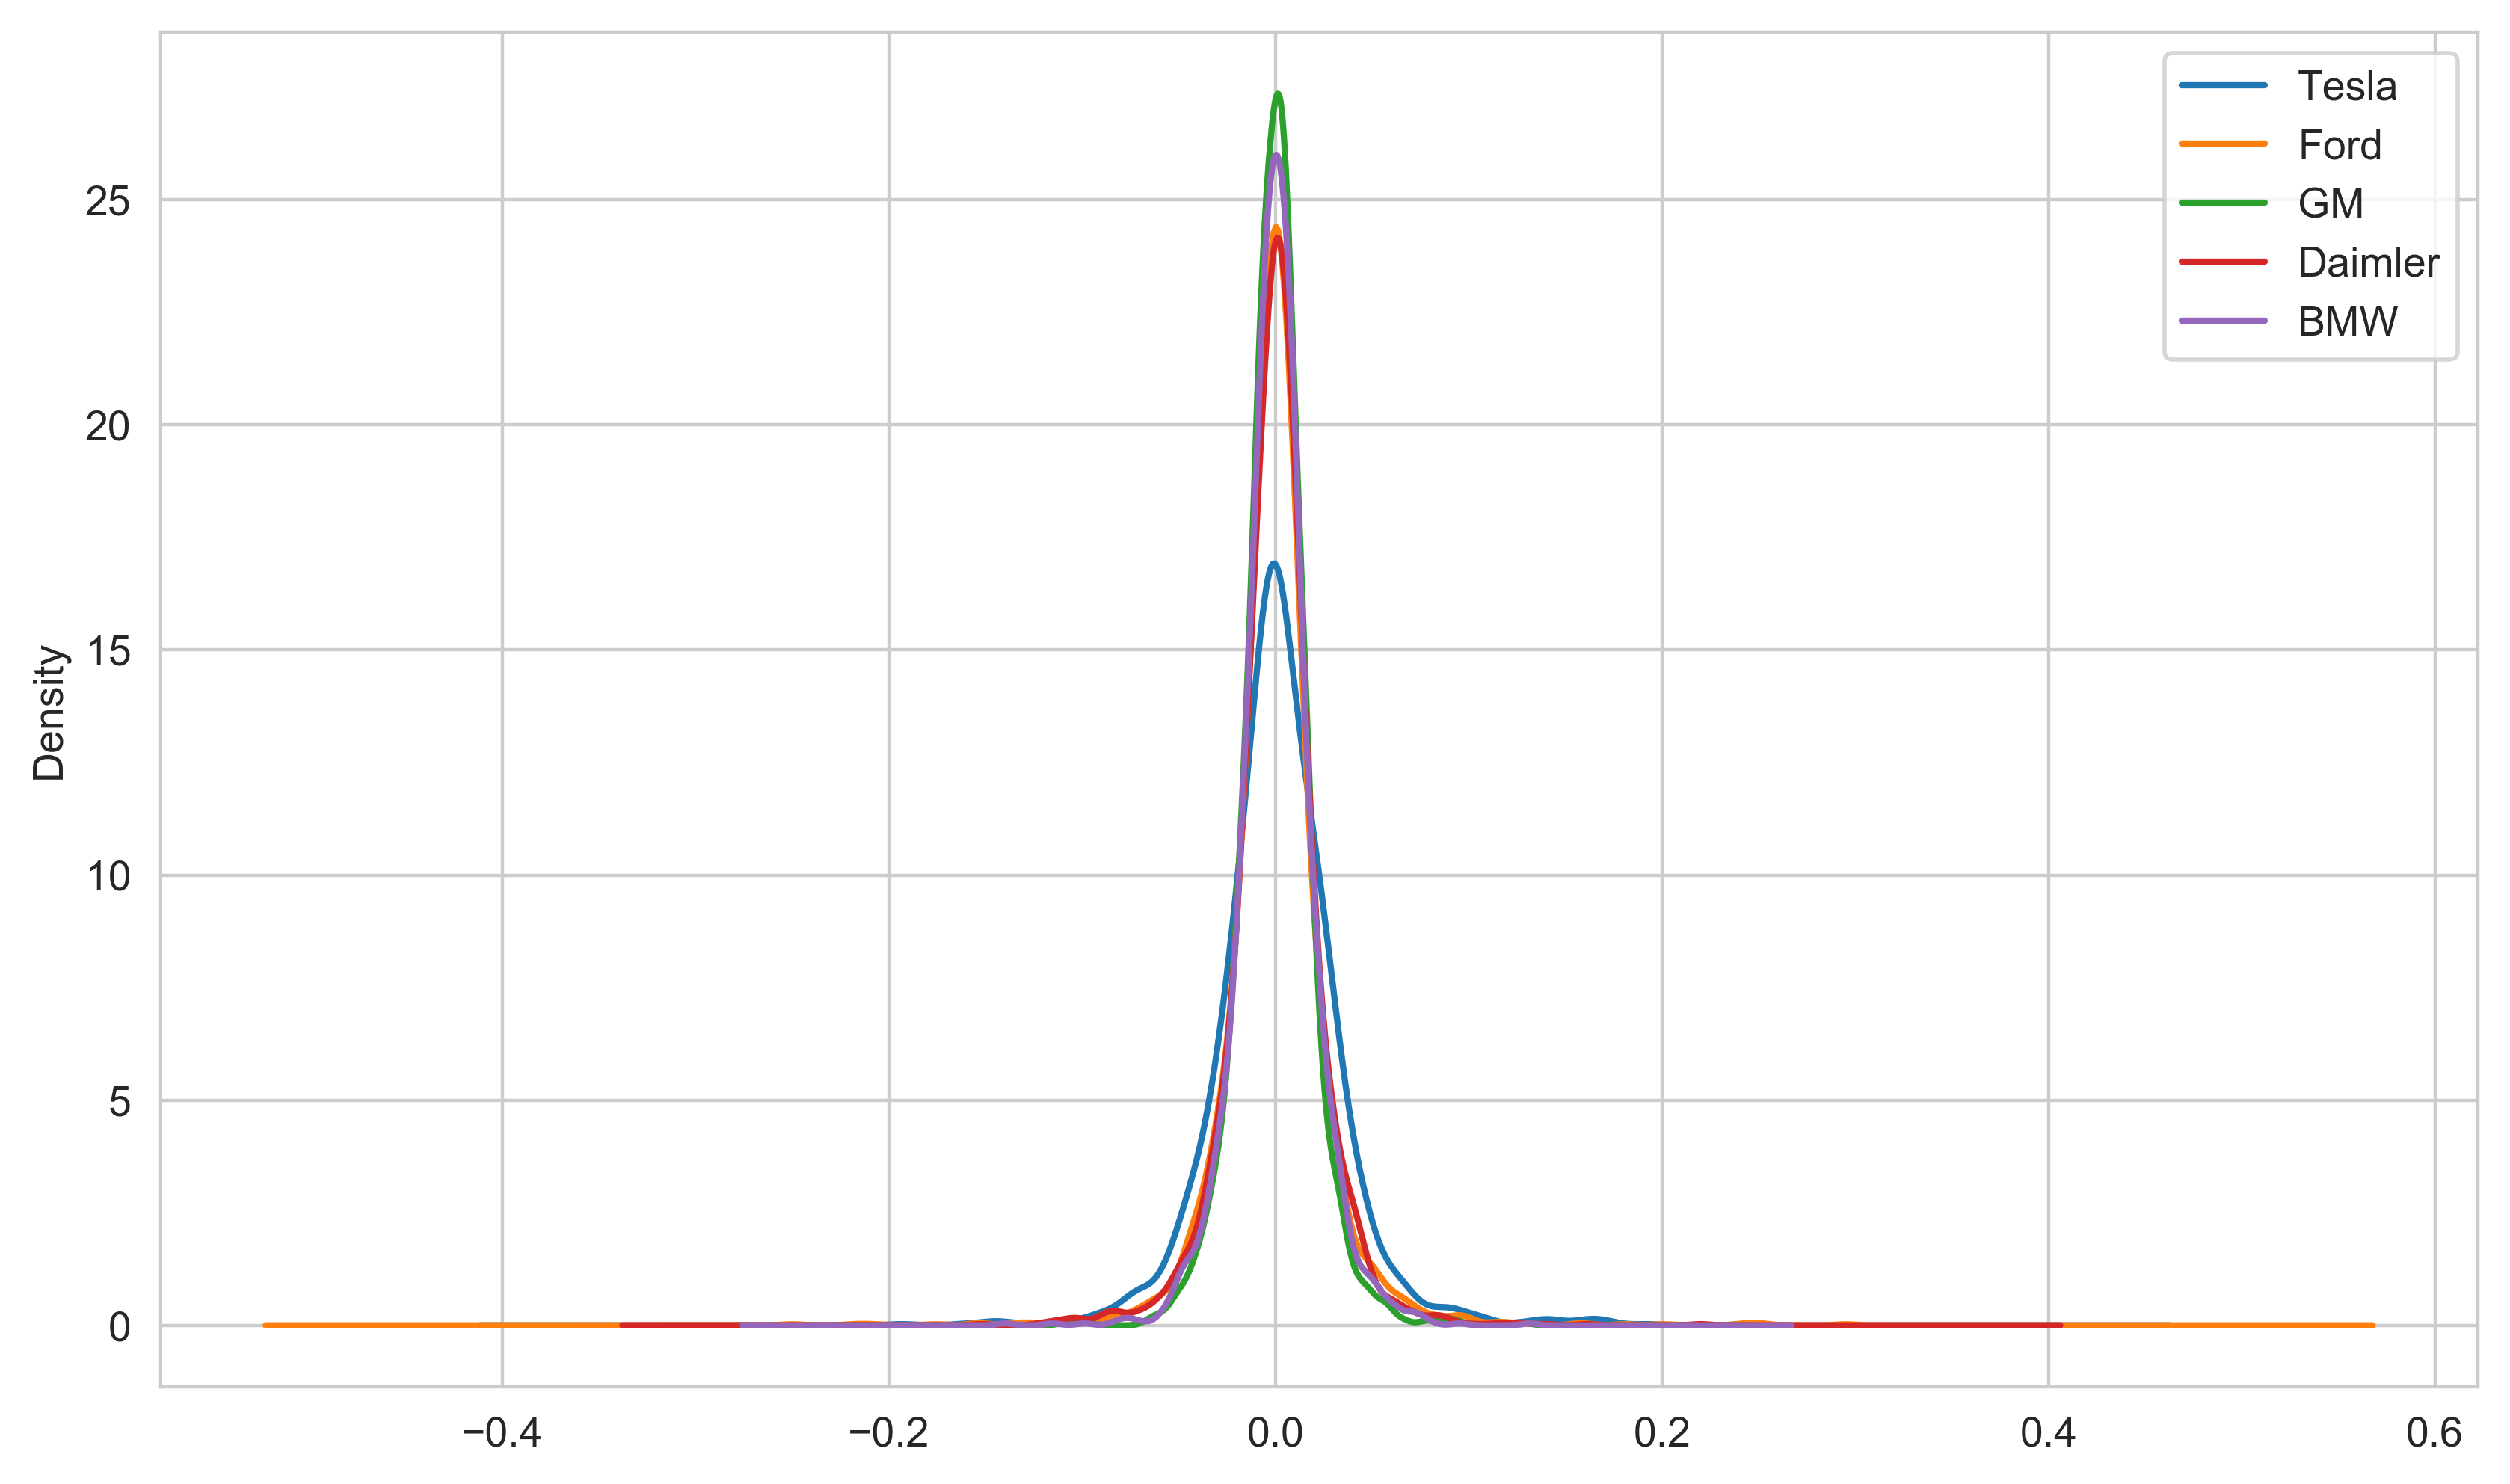

In [93]:
labels=['Tesla','Ford','GM','Daimler','BMW']
companies=[tesla,ford,gm,daimler,BMW]
fig = plt.figure(dpi=400)
for i in range(len(companies)):
    companies[i]['returns'].plot(kind='kde',label=labels[i],figsize=(10,6))
plt.legend();

## Boxplot for Returns

<Figure size 2400x1600 with 0 Axes>

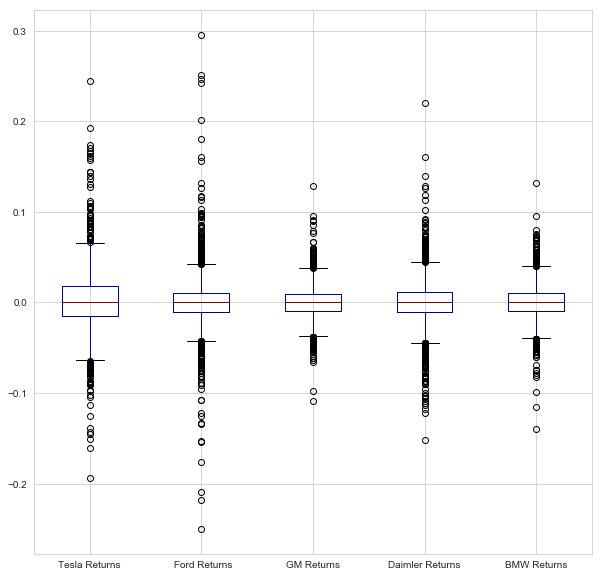

In [96]:
boxplot= pd.concat([tesla['returns'],ford['returns'],gm['returns'],daimler['returns'],BMW['returns']],axis=1)
boxplot.columns = ['Tesla Returns',' Ford Returns','GM Returns','Daimler Returns','BMW Returns']
boxplot.plot(kind='box',figsize=(10,10),colormap='jet');

## Scatter matrix of Returns columns
scatter matrix plot to see the correlation between each of the stocks daily returns.

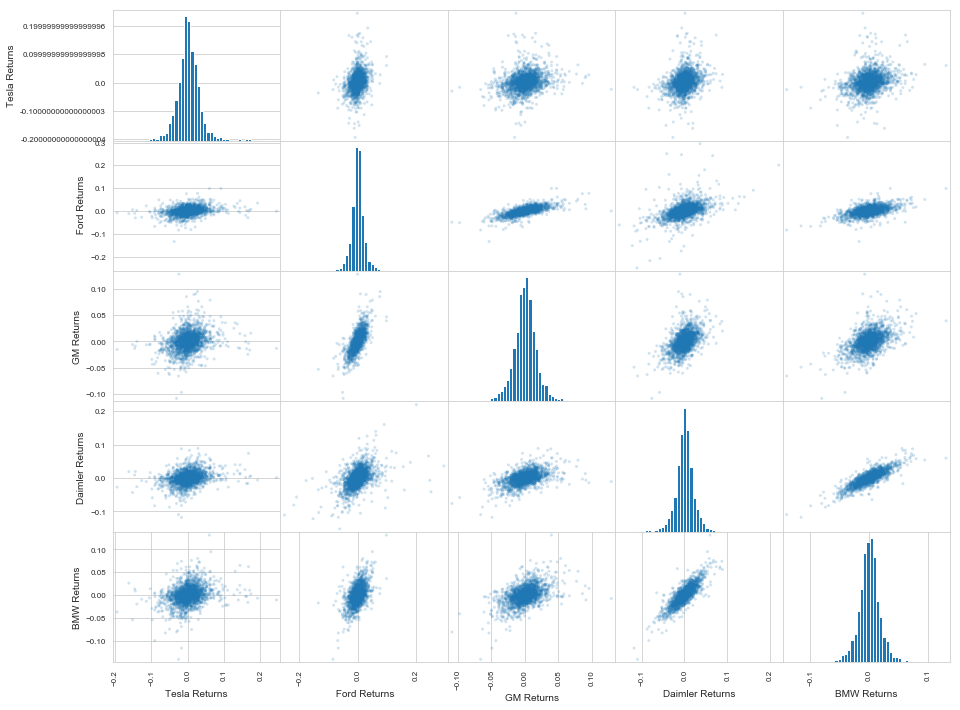

In [102]:
scatter_matrix(boxplot,figsize=(15,12),alpha=0.2,hist_kwds={'bins':50});

It looks like Ford and GM do have some sort of possible relationship.

## Cumulative daily returns

In [112]:
companies=[tesla,ford,gm,daimler,BMW]
for i in range(0,len(companies)):
    companies[i]['Cumulative Returns']=(1+companies[i]['returns']).cumprod()

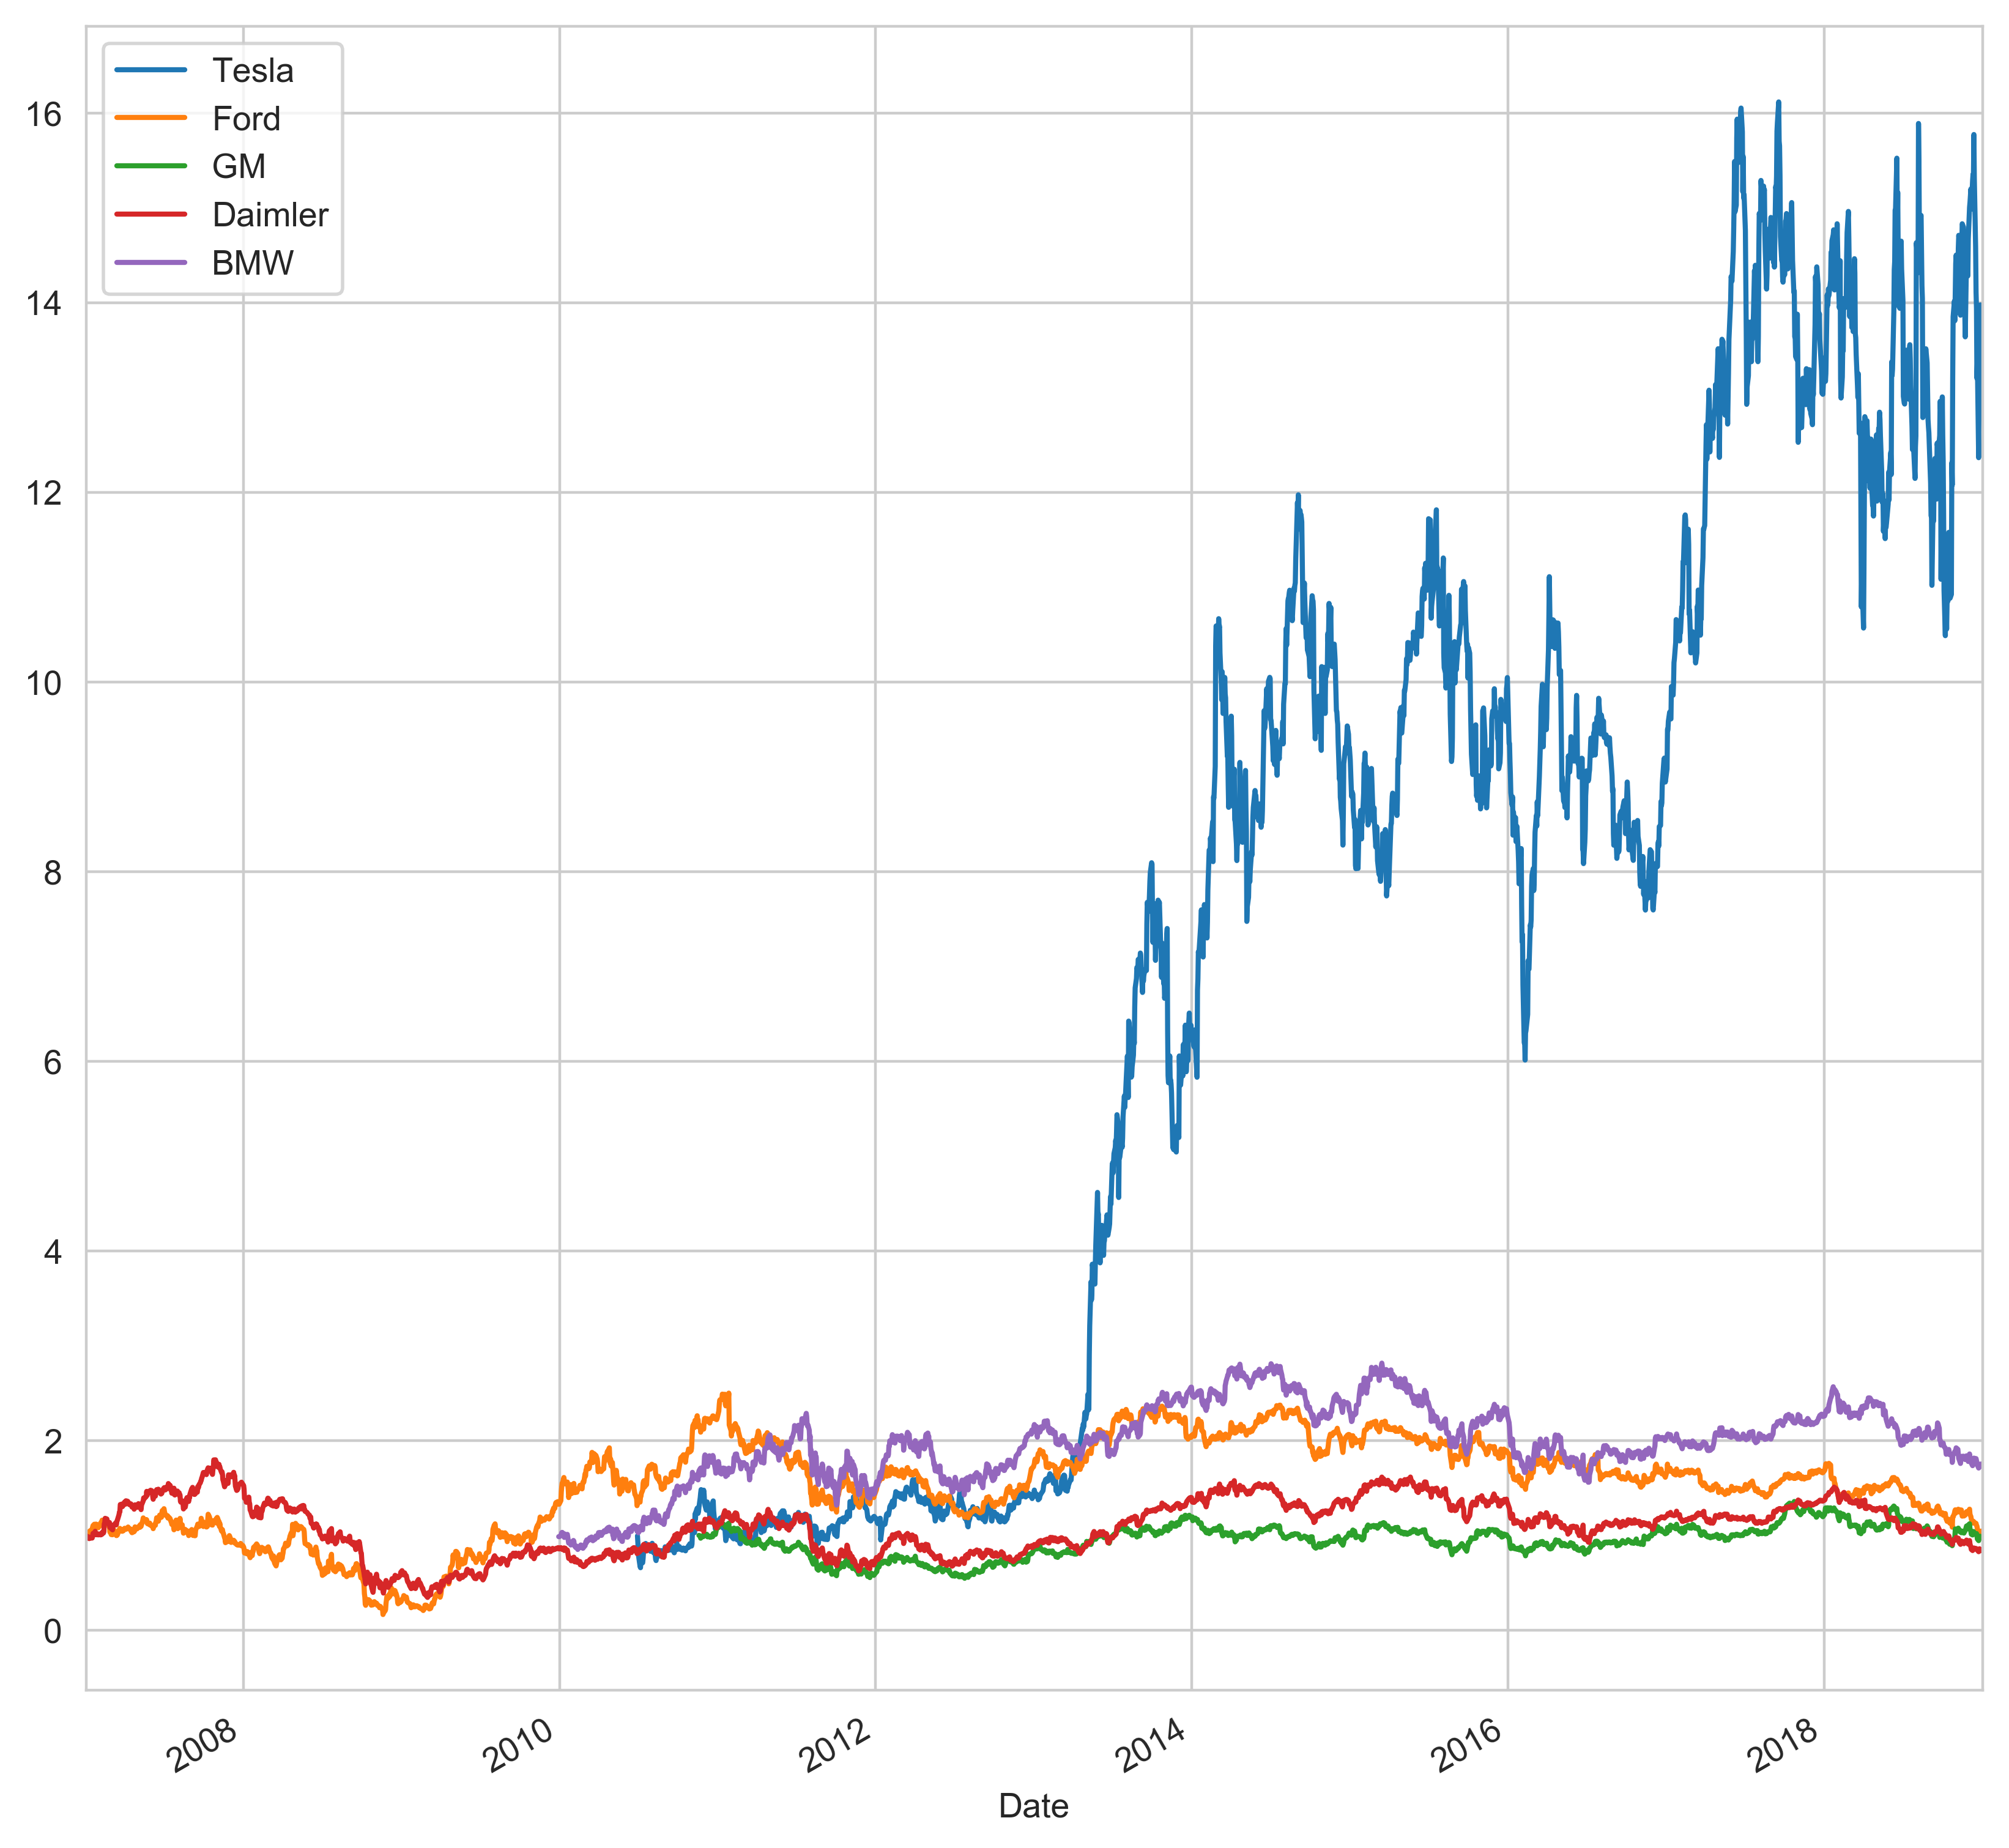

In [113]:
fig = plt.figure(dpi=400)
tesla['Cumulative Returns'].plot(label='Tesla',figsize=(10,10))
ford['Cumulative Returns'].plot(label='Ford',figsize=(10,10))
gm['Cumulative Returns'].plot(label='GM',figsize=(10,10))
daimler['Cumulative Returns'].plot(label='Daimler',figsize=(10,10))
BMW['Cumulative Returns'].plot(label='BMW',figsize=(10,10))
plt.legend()